In [1]:
import numpy as np
import pandas as pd
import sklearn

In [2]:
train_raw = pd.read_csv("input/data_set_ALL_AML_train.csv").drop(["Gene Description", "Gene Accession Number"], axis=1)
test_raw = pd.read_csv("input/data_set_ALL_AML_independent.csv").drop(["Gene Description", "Gene Accession Number"], axis=1)

In [3]:
df_train = pd.DataFrame(train_raw[[col for col in train_raw.columns if "call" not in col]]).T
df_test  = pd.DataFrame(test_raw[[col for col in test_raw.columns if "call" not in col]]).T

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

norm_values = StandardScaler().fit_transform(df_train.values)

n_components = 30
pca = PCA(n_components= n_components)
pca_res = pca.fit_transform(norm_values)

/Users/ObnoxiousFrog/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [5]:
cum_sum = pca.explained_variance_ratio_.cumsum()
cum_sum = cum_sum*100

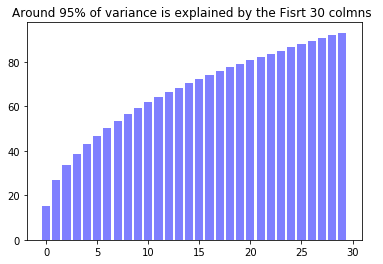

In [6]:
import matplotlib.pyplot as plt
plt.bar(range(30), cum_sum, label='Cumulative _Sum_of_Explained _Varaince', color = 'b',alpha=0.5)
plt.title("Around 95% of variance is explained by the Fisrt 30 colmns ");
plt.show()

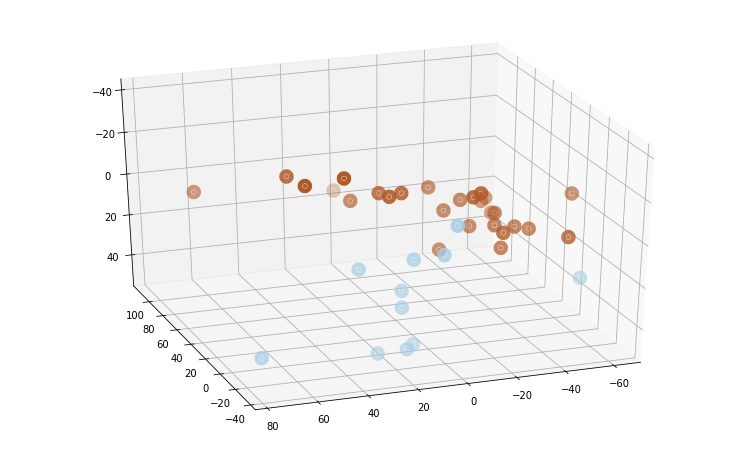

In [7]:
from sklearn.decomposition import PCA
pca_vis = PCA(n_components=3)
x_latent = pca_vis.fit_transform(norm_values)

category = pd.read_csv("input/actual.csv")['cancer'].values
category = pd.Series([1 if cat == 'ALL' else 0for cat in category])

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(10,6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(x_latent[:,0], x_latent[:,1], x_latent[:,2],
           c=category[:38].ravel(),cmap=plt.cm.Paired,
           linewidths=10)
plt.show()

In [14]:
from sklearn.gaussian_process import GaussianProcessClassifier as GPClass
from sklearn.gaussian_process.kernels import RBF

norm_values = StandardScaler().fit_transform(df_train.values)
x_lat = pca.transform(norm_values)

kernel = 1 * RBF( 2 * np.ones(30))
gp = GPClass(kernel=kernel)
gp.fit(x_lat, category[:38])

/Users/ObnoxiousFrog/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


GaussianProcessClassifier(copy_X_train=True,
             kernel=1**2 * RBF(length_scale=[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
             max_iter_predict=100, multi_class='one_vs_rest', n_jobs=1,
             n_restarts_optimizer=0, optimizer='fmin_l_bfgs_b',
             random_state=None, warm_start=False)

In [15]:
# Testing
norm_values_test = StandardScaler().fit_transform(df_test)
x_hat_lat = pca.transform(norm_values_test)

predict = gp.predict(x_hat_lat)
true = category[38:]

sklearn.metrics.confusion_matrix(true, predict)

array([[ 2, 12],
       [ 3, 17]])

In [17]:
gp.predict_proba(x_hat_lat)

array([[0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5],
       [0.5, 0.5]])